In [56]:
import pandas as pd
import numpy as np
from scipy.linalg import sqrtm
from scipy.special import softmax
import networkx as nx
from networkx.algorithms.community.modularity_max import greedy_modularity_communities
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib inline
from IPython.display import HTML

In [57]:
def draw_kkl(nx_G, label_map, node_color, pos=None, **kwargs):
    fig, ax = plt.subplots(figsize=(10, 10))
    if pos is None:
        pos = nx.spring_layout(nx_G, k=5 / np.sqrt(nx_G.number_of_nodes()))

    nx.draw(
        nx_G, pos, with_labels=label_map is not None,
        labels=label_map,
        node_color=node_color,
        ax=ax, **kwargs)

# Zachary's Karate Club


In [58]:
g = nx.karate_club_graph()

In [59]:
nx.is_weighted(g)

True

In [60]:
g.number_of_nodes(), g.number_of_edges()

(34, 78)

In [61]:
communities = greedy_modularity_communities(g)

In [62]:
colors = np.zeros(g.number_of_nodes())
for i, com in enumerate(communities):
    colors[list(com)] = i

n_classes = np.unique(colors).shape[0]
labels = np.eye(n_classes)[colors.astype(int)]

In [63]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [64]:
colors

array([2., 1., 1., 1., 2., 2., 2., 1., 0., 1., 2., 2., 1., 1., 0., 0., 2.,
       1., 0., 2., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [65]:
labels

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [66]:
club_labels = nx.get_node_attributes(g, 'club')

In [67]:
#_ = draw_kkl(g, club_labels, colors, cmap='gist_rainbow', edge_color='gray')

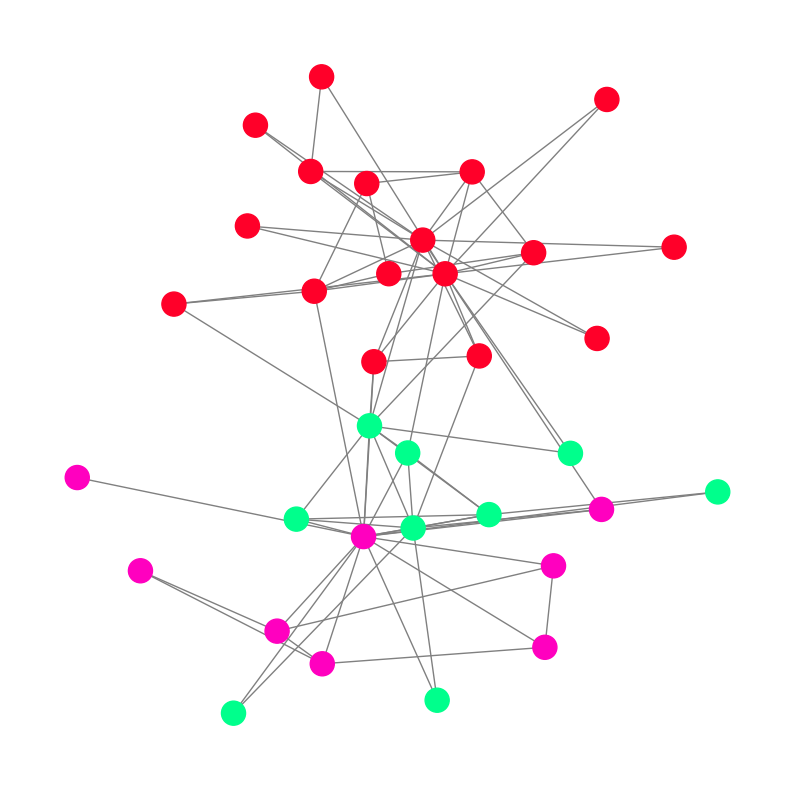

In [68]:
_ = draw_kkl(g, None, colors, cmap='gist_rainbow', edge_color='gray')

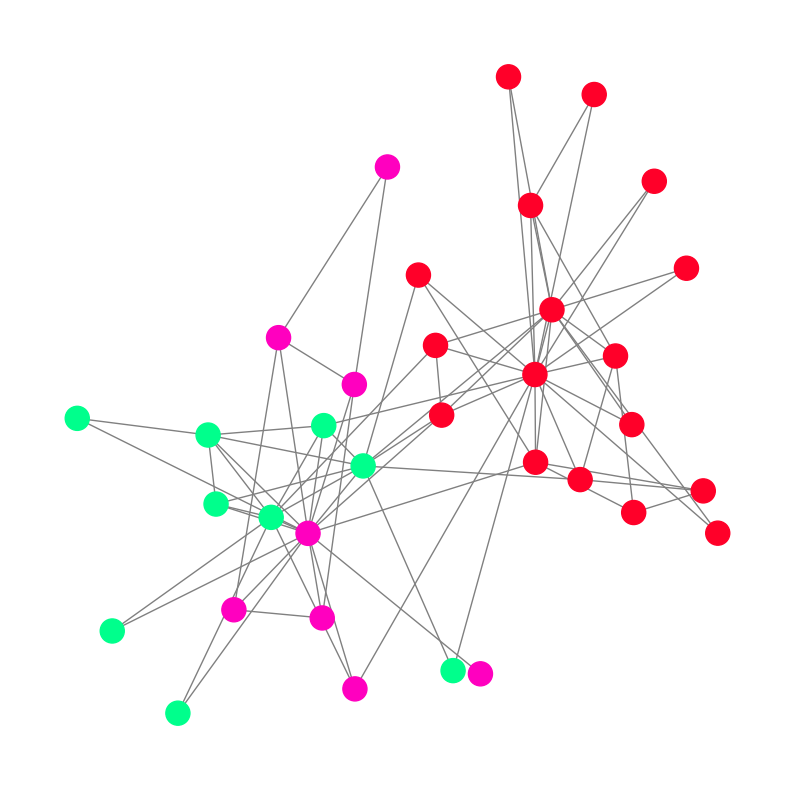

In [69]:
fig, ax = plt.subplots(figsize=(10, 10))
pos = nx.spring_layout(g, k=5 / np.sqrt(g.number_of_nodes()))
kwargs = {"cmap": 'gist_rainbow', "edge_color": 'gray'}
nx.draw(
    g, pos, with_labels=False,
    node_color=colors,
    ax=ax, **kwargs)
#plt.savefig('karate_club_graph.png', bbox_inches='tight', transparent=True)

In [70]:
A = nx.to_numpy_array(g)
A

array([[0., 4., 5., ..., 2., 0., 0.],
       [4., 0., 6., ..., 0., 0., 0.],
       [5., 6., 0., ..., 0., 2., 0.],
       ...,
       [2., 0., 0., ..., 0., 4., 4.],
       [0., 0., 2., ..., 4., 0., 5.],
       [0., 0., 0., ..., 4., 5., 0.]])

In [71]:
df = pd.DataFrame(A)
df.head();

In [72]:
A_mod = A + np.eye(g.number_of_nodes())  # add self-connections

D_mod = np.zeros_like(A_mod)
np.fill_diagonal(D_mod, np.asarray(A_mod.sum(axis=1)).flatten())

D_mod_invroot = np.linalg.inv(sqrtm(D_mod))

A_hat = D_mod_invroot @ A_mod @ D_mod_invroot

In [73]:
D_mod_invroot;

In [74]:
D_mod

array([[43.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., 30.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., 34., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 22.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0., 39.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0., 49.]])

In [75]:
df = pd.DataFrame(A_hat)
df.head()

0         1         2         3         4         5         6   \
0  0.023256  0.111369  0.130766  0.104957  0.152499  0.118125  0.122271   
1  0.111369  0.033333  0.187867  0.125656  0.000000  0.000000  0.000000   
2  0.130766  0.187867  0.029412  0.118033  0.000000  0.000000  0.000000   
3  0.104957  0.125656  0.118033  0.052632  0.000000  0.000000  0.000000   
4  0.152499  0.000000  0.000000  0.000000  0.111111  0.000000  0.178174   

         7         8         9   ...   24   25   26       27        28   29  \
0  0.081514  0.071889  0.000000  ...  0.0  0.0  0.0  0.00000  0.000000  0.0   
1  0.195180  0.000000  0.000000  ...  0.0  0.0  0.0  0.00000  0.000000  0.0   
2  0.183340  0.202113  0.085749  ...  0.0  0.0  0.0  0.09167  0.129641  0.0   
3  0.183942  0.000000  0.000000  ...  0.0  0.0  0.0  0.00000  0.000000  0.0   
4  0.000000  0.000000  0.000000  ...  0.0  0.0  0.0  0.00000  0.000000  0.0   

         30        31        32   33  
0  0.000000  0.065026  0.000000  0.0  
1  0.105409  0.000000  0.000000  0.0  
2  0.000000  0.000000  0.054924  0.0  
3  0.000000  0.000000  0.000000  0.0  
4  0.000000  0.000000  0.000000  0.0  

[5 rows x 34 columns]

In [76]:
X = np.eye(g.number_of_nodes())

Great resource for handling matrices/vectors/dots/transposes when deriving gradient equations:  [Stanford CS224n Gradient Notes](https://web.stanford.edu/class/cs224n/readings/gradient-notes.pdf)

In [77]:
"""This Python function `glorot_init` implements the Glorot initialization, also known as Xavier initialization,
which is a method for initializing the weights of neural networks. Here's what it does:

1. It calculates the standard deviation (`sd`) using the Glorot initialization formula:

   \[ sd = \sqrt{\frac{6.0}{\text{nin} + \text{nout}}} \]

   Where `nin` is the number of input units and `nout` is the number of output units.

2. It generates random weights from a uniform distribution bounded by \[-sd, sd\] using NumPy's `np.random.uniform` function. 
The shape of the weights matrix is specified by `(nin, nout)`.

3. Finally, it returns the initialized weights.

In summary, this function provides a way to initialize the weights of a neural network layer using Glorot initialization,
which is designed to help stabilize the training process and improve convergence rates by ensuring that the initial weights 
are not too large or too small."""


def glorot_init(nin, nout):
    sd = np.sqrt(6.0 / (nin + nout))
    return np.random.uniform(-sd, sd, size=(nin, nout))


"""This Python function `xent` calculates the cross-entropy loss between predicted probabilities and true labels. Here's how it works:

1. It takes two inputs:
   - `pred`: A 2D NumPy array representing the predicted probabilities for each class. 
   Each row corresponds to a different example, and each column corresponds to the predicted probability of 
   that example belonging to a particular class.
   - `labels`: A 2D NumPy array representing the true labels in a one-hot encoded format. Each row corresponds to a 
   different example, and each column corresponds to whether that example belongs to a particular class (1 if it does, 0 otherwise).

2. It calculates the negative logarithm of the predicted probabilities using NumPy's `np.log` function. 
The negative logarithm is used because cross-entropy loss is typically minimized, and taking the negative 
ensures that minimizing the loss is equivalent to maximizing the likelihood of the true labels.

3. It then selects the elements of the negative logarithm corresponding to the true labels using NumPy's indexing. 
This is done using fancy indexing with `np.arange(pred.shape[0])` to create an array of indices from 0 to the number 
of rows in `pred`, and `np.argmax(labels, axis=1)` to find the index of the maximum value along the columns of `labels`, 
effectively selecting the predicted probability associated with the true class for each example.

4. Finally, it returns the calculated cross-entropy loss for each example.

In summary, this function provides a way to calculate the cross-entropy loss between predicted probabilities and true labels, which is 
commonly used as a loss function in classification tasks, especially when dealing with multiple classes."""


def xent(pred, labels):
    return -np.log(pred)[np.arange(pred.shape[0]), np.argmax(labels, axis=1)]


"""This Python function `norm_diff` calculates the relative difference between two matrices `dW` and `dW_approx` using the Frobenius norm.
Here's how it works:

1. It takes two inputs:
   - `dW`: A matrix representing the true gradient.
   - `dW_approx`: A matrix representing the approximate gradient.

2. It calculates the Frobenius norm of the element-wise difference between `dW` and `dW_approx` using NumPy's `np.linalg.norm` function.

3. It then divides this norm by the sum of the Frobenius norms of `dW` and `dW_approx`.

4. Finally, it returns the relative difference between the two matrices.

In summary, this function provides a way to measure the relative difference between two matrices, 
which can be useful for evaluating the accuracy of gradient computations or comparing two sets of parameters in numerical computations."""


def norm_diff(dW, dW_approx):
    return np.linalg.norm(dW - dW_approx) / (np.linalg.norm(dW) + np.linalg.norm(dW_approx))


class GradDescentOptim:
    def __init__(self, lr, wd):
        self.lr = lr
        self.wd = wd
        self._y_pred = None
        self._y_true = None
        self._out = None
        self.bs = None
        self.train_nodes = None

    def __call__(self, y_pred, y_true, train_nodes=None):
        self.y_pred = y_pred
        self.y_true = y_true

        if train_nodes is None:
            self.train_nodes = np.arange(y_pred.shape[0])
        else:
            self.train_nodes = train_nodes

        self.bs = self.train_nodes.shape[0]

    @property
    def out(self):
        return self._out

    @out.setter
    def out(self, y):
        self._out = y


class GCNLayer:
    def __init__(self, n_inputs, n_outputs, activation=None, name=''):
        #Number of input/output features
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        # Initialising weights 
        self.W = glorot_init(self.n_outputs, self.n_inputs)
        # Activation function if needed, probably not gonna use it but ok
        self.activation = activation
        # Convenient display
        self.name = name

    def __repr__(self):
        return f"GCN: W{'_' + self.name if self.name else ''} ({self.n_inputs}, {self.n_outputs})"

    def forward(self, A, X, W=None):
        """
        Assumes A is (bs, bs) adjacency matrix and X is (bs, D), 
            where bs = "batch size" and D = input feature length
        """
        self._A = A  #Normalised Adjacency matrix layers.
        self._X = (A @ X).T  # for calculating gradients.  (D, bs)

        if W is None:
            W = self.W

        H = W @ self._X  # (h, D)*(D, bs) -> (h, bs)
        if self.activation is not None:
            H = self.activation(H)
        self._H = H  # (h, bs)
        return self._H.T  # (bs, h)

    def backward(self, optim, update=True):
        dtanh = 1 - np.asarray(self._H.T) ** 2  # (bs, out_dim)
        d2 = np.multiply(optim.out, dtanh)  # (bs, out_dim) *element_wise* (bs, out_dim)

        self.grad = self._A @ d2 @ self.W  # (bs, bs)*(bs, out_dim)*(out_dim, in_dim) = (bs, in_dim)     
        optim.out = self.grad

        dW = np.asarray(d2.T @ self._X.T) / optim.bs  # (out_dim, bs)*(bs, D) -> (out_dim, D)
        dW_wd = self.W * optim.wd / optim.bs  # weight decay update

        if update:
            self.W -= (dW + dW_wd) * optim.lr

        return dW + dW_wd


class SoftmaxLayer():
    def __init__(self, n_inputs, n_outputs, name=''):
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        self.W = glorot_init(self.n_outputs, self.n_inputs)
        # biad term
        self.b = np.zeros((self.n_outputs, 1))
        self.name = name
        self._X = None  # Used to calculate gradients

    def __repr__(self):
        return f"Softmax: W{'_' + self.name if self.name else ''} ({self.n_inputs}, {self.n_outputs})"

    #added trick, will ignore in first copy
    def shift(self, proj):
        shiftx = proj - np.max(proj, axis=0, keepdims=True)
        exps = np.exp(shiftx)
        return exps / np.sum(exps, axis=0, keepdims=True)

    def forward(self, X, W=None, b=None):
        """Compute the softmax of vector x in a numerically stable way.
        
        X is assumed to be (bs, h)
        """
        self._X = X.T
        if W is None:
            W = self.W
        if b is None:
            b = self.b

        proj = np.asarray(W @ self._X) + b  # (out, h)*(h, bs) = (out, bs)
        print("Printing Proj", proj.T)
        l = self.shift(proj).T
        print("L=", l)
        return l # (bs, out)

    def backward(self, optim, update=True):
        # should take in optimizer, update its own parameters and update the optimizer's "out"
        # Build mask on loss
        train_mask = np.zeros(optim.y_pred.shape[0])
        train_mask[optim.train_nodes] = 1
        train_mask = train_mask.reshape((-1, 1))

        # derivative of loss w.r.t. activation (pre-softmax)
        d1 = np.asarray((optim.y_pred - optim.y_true))  # (bs, out_dim)
        d1 = np.multiply(d1, train_mask)  # (bs, out_dim) with loss of non-train nodes set to zero

        self.grad = d1 @ self.W  # (bs, out_dim)*(out_dim, in_dim) = (bs, in_dim)
        optim.out = self.grad

        dW = (d1.T @ self._X.T) / optim.bs  # (out_dim, bs)*(bs, in_dim) -> (out_dim, in_dim)
        db = d1.T.sum(axis=1, keepdims=True) / optim.bs  # (out_dim, 1)

        dW_wd = self.W * optim.wd / optim.bs  # weight decay update

        if update:
            self.W -= (dW + dW_wd) * optim.lr
            self.b -= db.reshape(self.b.shape) * optim.lr

        return dW + dW_wd, db.reshape(self.b.shape)

In [78]:
gcn1 = GCNLayer(g.number_of_nodes(), 2, activation=np.tanh, name='1')
sm1 = SoftmaxLayer(2, n_classes, "SM")
opt = GradDescentOptim(lr=0, wd=1.)

In [79]:
gcn1_out = gcn1.forward(A_hat, X)
opt(sm1.forward(gcn1_out), labels)

Printing Proj [[-1.32821059e-01  1.55106042e-01 -9.60679560e-02]
 [-1.81136621e-01  1.43216835e-01 -1.27979498e-01]
 [-1.11056065e-01  1.42002583e-01 -8.08725719e-02]
 [-2.21088561e-01 -7.25674699e-02 -1.45218077e-01]
 [ 6.84912334e-02  9.84641462e-02  4.16118759e-02]
 [ 2.09974502e-01  7.57780532e-02  1.37613333e-01]
 [ 1.70747339e-01  7.22162622e-02  1.11433935e-01]
 [-1.51338927e-01  1.12406204e-02 -1.02110237e-01]
 [-9.33485649e-02 -4.23203027e-02 -6.07954547e-02]
 [-3.32608311e-02 -2.26225897e-02 -2.13267986e-02]
 [ 2.87693902e-03  7.82382898e-02 -1.54392263e-03]
 [ 1.07469564e-01 -1.75863338e-02  7.29376743e-02]
 [-7.25796646e-02  2.77950012e-02 -4.99656417e-02]
 [-1.44085703e-01 -5.47614173e-02 -9.43083565e-02]
 [-4.78976308e-02 -8.42500605e-02 -2.84164909e-02]
 [-5.27200437e-02 -8.63131484e-02 -3.15626735e-02]
 [ 1.43753514e-01  8.40163067e-02  9.27857470e-02]
 [ 7.82284199e-02  1.04063130e-01  4.79008274e-02]
 [ 8.77963094e-02 -2.85124841e-02  6.02141649e-02]
 [ 4.24409934e-02

# The Model

In [80]:
class GCNNetwork():
    def __init__(self, n_inputs, n_outputs, n_layers, hidden_sizes, activation, seed=0):
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        self.n_layers = n_layers
        self.hidden_sizes = hidden_sizes
        self.activation = activation

        np.random.seed(seed)

        self.layers = list()
        # Input layer
        gcn_in = GCNLayer(n_inputs, hidden_sizes[0], activation, name='in')
        self.layers.append(gcn_in)

        # Hidden layers
        for layer in range(n_layers):
            gcn = GCNLayer(self.layers[-1].W.shape[0], hidden_sizes[layer], activation, name=f'h{layer}')
            self.layers.append(gcn)

        # Output layer
        sm_out = SoftmaxLayer(hidden_sizes[-1], n_outputs, name='sm')
        self.layers.append(sm_out)

    def __repr__(self):
        return '\n'.join([str(l) for l in self.layers])

    def embedding(self, A, X):
        # Loop through all GCN layers
        H = X
        for layer in self.layers[:-1]:
            H = layer.forward(A, H)
        return np.asarray(H)

    def forward(self, A, X):
        # GCN layers
        H = self.embedding(A, X)

        # Softmax
        p = self.layers[-1].forward(H)

        return np.asarray(p)

In [81]:
gcn_model = GCNNetwork(
    n_inputs=g.number_of_nodes(),
    n_outputs=n_classes,
    n_layers=2,
    hidden_sizes=[16, 2],
    activation=np.tanh,
    seed=100,
)
gcn_model

GCN: W_in (34, 16)
GCN: W_h0 (16, 16)
GCN: W_h1 (16, 2)
Softmax: W_sm (2, 3)

In [82]:
y_pred = gcn_model.forward(A_hat, X)
embed = gcn_model.embedding(A_hat, X)
xent(y_pred, labels).mean()

Printing Proj [[ 0.0169262   0.00795423 -0.01678291]
 [ 0.04576668  0.01394303 -0.0357137 ]
 [ 0.0612657   0.00612175 -0.03178102]
 [ 0.03193627  0.01844405 -0.03605638]
 [-0.00606174 -0.0183165   0.02577479]
 [-0.00765353 -0.02680406  0.03724244]
 [-0.02076617  0.00345826  0.00370204]
 [ 0.02941255  0.00813248 -0.02189363]
 [ 0.05398148  0.00748913 -0.03067962]
 [ 0.0337224   0.00907823 -0.02478751]
 [-0.02108565  0.00994741 -0.00446465]
 [-0.0067856  -0.01178114  0.01770719]
 [ 0.004173    0.00993113 -0.01432161]
 [ 0.03727873  0.00635313 -0.02269622]
 [ 0.03698793  0.0033488  -0.01874366]
 [ 0.04404436  0.00369542 -0.02194608]
 [-0.01311287 -0.00457812  0.01097776]
 [ 0.00374835 -0.00667624  0.00706485]
 [ 0.03080383  0.00407834 -0.01725746]
 [ 0.0177905  -0.00236244 -0.00393858]
 [ 0.03273461  0.00214845 -0.01554656]
 [ 0.01701838 -0.00216211 -0.00389261]
 [ 0.03946588  0.00385815 -0.02036353]
 [ 0.06886841 -0.01430634 -0.00865178]
 [ 0.03830701 -0.01137234 -0.00044928]
 [ 0.046565

1.0763527735684253

In [83]:
y_pred

array([[0.3380753 , 0.33505567, 0.32686902],
       [0.3459695 , 0.33513284, 0.31889766],
       [0.34995627, 0.33118074, 0.31886299],
       [0.34236425, 0.33777602, 0.31985974],
       [0.33110733, 0.32707445, 0.34181823],
       [0.33036547, 0.32409899, 0.34553554],
       [0.32794517, 0.33598646, 0.33606837],
       [0.34142132, 0.33423261, 0.32434607],
       [0.34802031, 0.3322104 , 0.31976929],
       [0.34260351, 0.33426352, 0.32313297],
       [0.32805391, 0.33839404, 0.33355206],
       [0.33114643, 0.3294963 , 0.33935727],
       [0.33473362, 0.33666662, 0.32859975],
       [0.34348494, 0.33302503, 0.32349003],
       [0.34332249, 0.33196551, 0.324712  ],
       [0.34523305, 0.33158055, 0.3231864 ],
       [0.32971151, 0.33253756, 0.33775092],
       [0.33411834, 0.33065338, 0.33522828],
       [0.34168131, 0.33267065, 0.32564804],
       [0.33800295, 0.33125938, 0.33073768],
       [0.34214438, 0.33183792, 0.32601769],
       [0.33780264, 0.33138516, 0.3308122 ],
       [0.

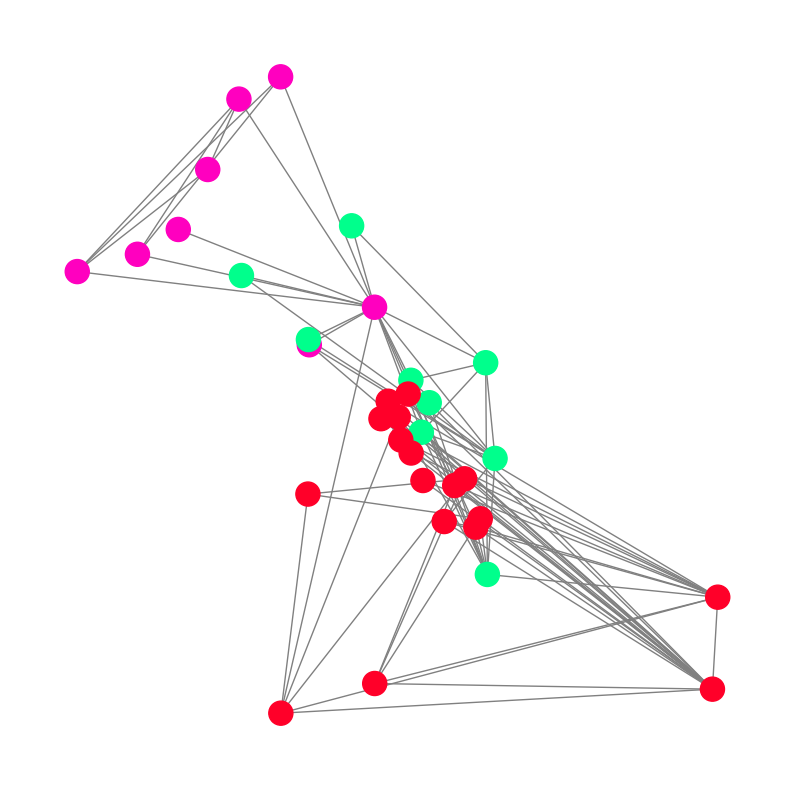

In [84]:
pos = {i: embed[i, :] for i in range(embed.shape[0])}
_ = draw_kkl(g, None, colors, pos=pos, cmap='gist_rainbow', edge_color='gray')

### Training

In [85]:
train_nodes = np.array([0, 1, 8])
test_nodes = np.array([i for i in range(labels.shape[0]) if i not in train_nodes])
opt2 = GradDescentOptim(lr=2e-2, wd=2.5e-2)

In [86]:
test_nodes

array([ 2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [87]:
embeds = list()
accs = list()
train_losses = list()
test_losses = list()

loss_min = 1e6
es_iters = 0
es_steps = 50
# lr_rate_ramp = 0 #-0.05
# lr_ramp_steps = 1000

for epoch in range(15000):

    y_pred = gcn_model.forward(A_hat, X)

    opt2(y_pred, labels, train_nodes)

    #     if ((epoch+1) % lr_ramp_steps) == 0:
    #         opt2.lr *= 1+lr_rate_ramp
    #         print(f"LR set to {opt2.lr:.4f}")

    for layer in reversed(gcn_model.layers):
        layer.backward(opt2, update=True)

    embeds.append(gcn_model.embedding(A_hat, X))
    # Accuracy for non-training nodes
    acc = (np.argmax(y_pred, axis=1) == np.argmax(labels, axis=1))[
        [i for i in range(labels.shape[0]) if i not in train_nodes]
    ]
    accs.append(acc.mean())

    loss = xent(y_pred, labels)
    loss_train = loss[train_nodes].mean()
    loss_test = loss[test_nodes].mean()

    train_losses.append(loss_train)
    test_losses.append(loss_test)

    if loss_test < loss_min:
        loss_min = loss_test
        es_iters = 0
    else:
        es_iters += 1

    if es_iters > es_steps:
        print("Early stopping!")
        break

    if epoch % 100 == 0:
        print(f"Epoch: {epoch + 1}, Train Loss: {loss_train:.3f}, Test Loss: {loss_test:.3f}")

train_losses = np.array(train_losses)
test_losses = np.array(test_losses)

Printing Proj [[ 0.0169262   0.00795423 -0.01678291]
 [ 0.04576668  0.01394303 -0.0357137 ]
 [ 0.0612657   0.00612175 -0.03178102]
 [ 0.03193627  0.01844405 -0.03605638]
 [-0.00606174 -0.0183165   0.02577479]
 [-0.00765353 -0.02680406  0.03724244]
 [-0.02076617  0.00345826  0.00370204]
 [ 0.02941255  0.00813248 -0.02189363]
 [ 0.05398148  0.00748913 -0.03067962]
 [ 0.0337224   0.00907823 -0.02478751]
 [-0.02108565  0.00994741 -0.00446465]
 [-0.0067856  -0.01178114  0.01770719]
 [ 0.004173    0.00993113 -0.01432161]
 [ 0.03727873  0.00635313 -0.02269622]
 [ 0.03698793  0.0033488  -0.01874366]
 [ 0.04404436  0.00369542 -0.02194608]
 [-0.01311287 -0.00457812  0.01097776]
 [ 0.00374835 -0.00667624  0.00706485]
 [ 0.03080383  0.00407834 -0.01725746]
 [ 0.0177905  -0.00236244 -0.00393858]
 [ 0.03273461  0.00214845 -0.01554656]
 [ 0.01701838 -0.00216211 -0.00389261]
 [ 0.03946588  0.00385815 -0.02036353]
 [ 0.06886841 -0.01430634 -0.00865178]
 [ 0.03830701 -0.01137234 -0.00044928]
 [ 0.046565

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Printing Proj [[-3.31878087  0.03544706  3.02081788]
 [-1.10205062  2.03221906 -1.12251058]
 [ 0.50513247  1.54479623 -2.10222953]
 [-1.32524873  1.82222652 -0.6959736 ]
 [-3.45619467 -0.22668779  3.42239143]
 [-3.55144893 -0.22731766  3.51133571]
 [-3.54698789 -0.22812013  3.50804048]
 [-0.92955041  1.604461   -0.834923  ]
 [ 3.17529074  0.13041674 -3.09748823]
 [ 2.60682129  0.0656734  -2.50288196]
 [-3.48848001 -0.23173175  3.45759112]
 [-2.29186682  0.17060014  1.92765317]
 [-1.44003548  1.02533743  0.24402204]
 [-0.12790368  1.47976316 -1.44747721]
 [ 3.40238275 -0.11620702 -3.04997877]
 [ 3.53550271 -0.10888603 -3.18101788]
 [-3.50043863 -0.24375847  3.48125571]
 [-1.72967361  0.49577744  1.06643018]
 [ 3.138274   -0.12684478 -2.7940645 ]
 [-0.51139558  0.73775491 -0.31584464]
 [ 3.31200407 -0.1218338  -2.96032621]
 [-1.46645459  0.73417249  0.57308905]
 [ 3.38850348 -0.11250203 -3.04099062]
 [ 3.79681501 -0.10926637 -3.42281452]
 [ 3.17531281 -0.15250624 -2.80154968]
 [ 3.524937

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



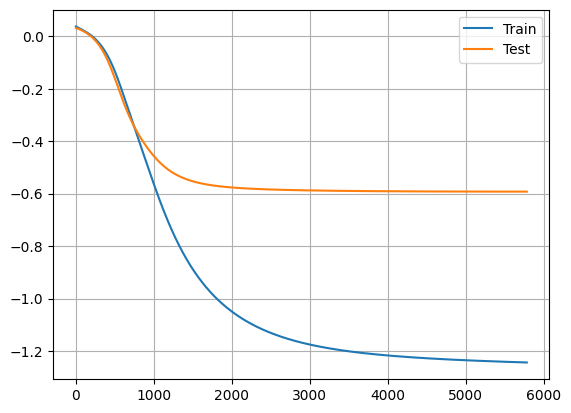

In [88]:
fig, ax = plt.subplots()
ax.plot(np.log10(train_losses), label='Train')
ax.plot(np.log10(test_losses), label='Test')
ax.legend()
ax.grid()

In [89]:
accs[-1]

0.9032258064516129

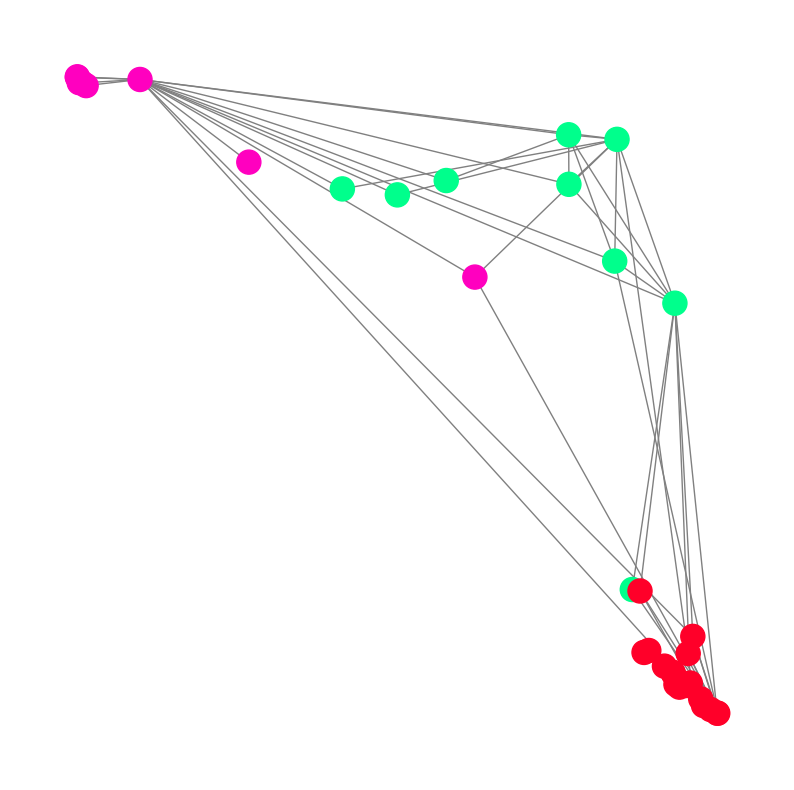

In [90]:
pos = {i: embeds[-1][i, :] for i in range(embeds[-1].shape[0])}
_ = draw_kkl(g, None, colors, pos=pos, cmap='gist_rainbow', edge_color='gray')

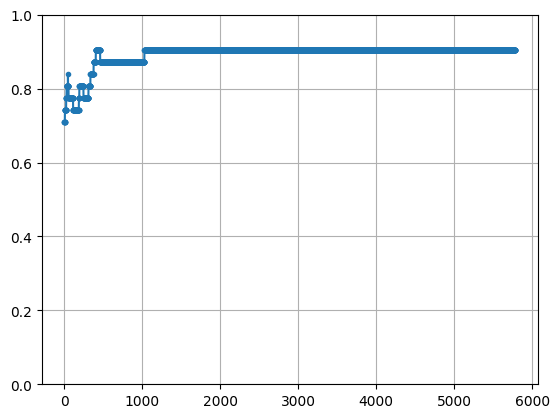

In [91]:
fig, ax = plt.subplots()
_ = ax.plot(accs, marker='.')
ax.grid()
_ = ax.set(ylim=[0, 1])

In [92]:
N = 500
snapshots = np.linspace(0, len(embeds) - 1, N).astype(int)

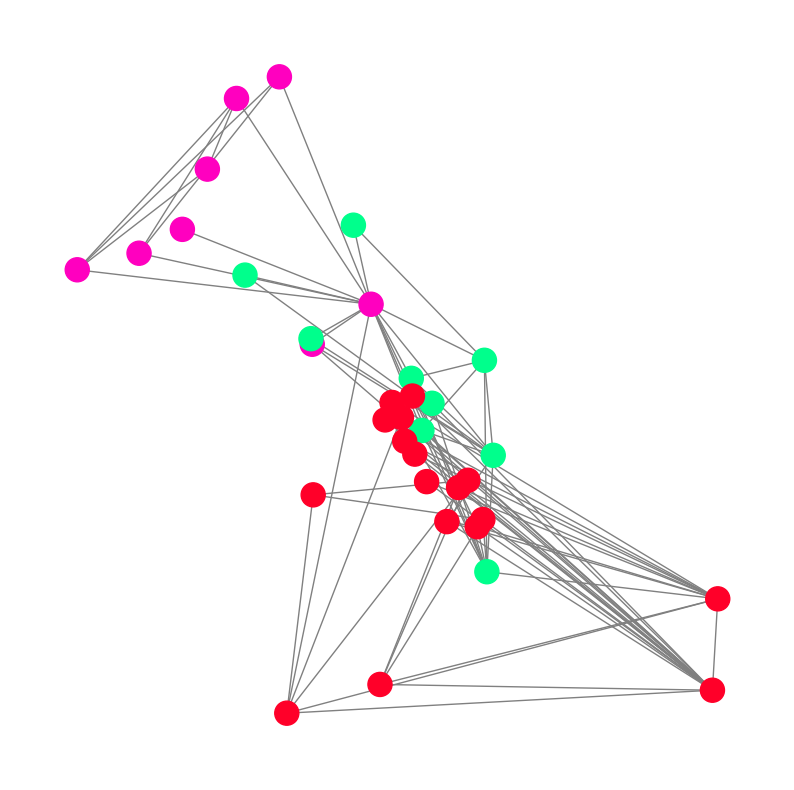

In [93]:
# Build plot
fig, ax = plt.subplots(figsize=(10, 10))
kwargs = {'cmap': 'gist_rainbow', 'edge_color': 'gray', }  #'node_size': 55}


def update(idx):
    ax.clear()
    embed = embeds[snapshots[idx]]
    pos = {i: embed[i, :] for i in range(embed.shape[0])}
    nx.draw(g, pos, node_color=colors, ax=ax, **kwargs)


anim = animation.FuncAnimation(fig, update, frames=snapshots.shape[0], interval=10, repeat=False)